# Learning objectives

1. Discuss GTEx RNA-seq
2. Practice data frame manipulation
3. Cluster samples by patterns of gene expression
4. Assess what these clusters represent

# Load packages 

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# GTEx RPKMs

## Load data

In [105]:
# df_fpkms = pd.read_csv( "../../qbb2019/data/all.csv" )
df_rpkms = pd.read_csv( "~/Downloads/gtex_v3.csv" )
df_rpkms

,Name,Description,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,GTEX-N7MS-0011-R5a-SM-2HMK8,...,GTEX-X4LF-0526-SM-3NMB6,GTEX-X4LF-1726-SM-3NMBZ,GTEX-X4XX-0005-SM-3NMCS,GTEX-X4XX-0011-R1B-SM-3P622,GTEX-X4XX-0011-R2A-SM-3P623,GTEX-X4XX-0126-SM-3NMC2,GTEX-X4XX-0626-SM-3NMC1,GTEX-X4XX-1126-SM-3NMBY,GTEX-X4XX-2926-SM-3NMB1,GTEX-X4XX-3026-SM-3NMB2
0,ENSG00000223972.4,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.029181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050261,0.000000
1,ENSG00000227232.3,WASH7P,2.917592,1.958602,5.841671,1.728239,2.315600,3.742634,2.269886,2.442356,...,9.417033,7.007399,6.276984,3.710413,5.769073,12.540883,4.696292,4.555761,9.459983,5.700174
2,ENSG00000243485.1,MIR1302-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.102921,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613.2,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000240361.1,OR4G11P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015078,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52571,ENSG00000198786.2,MT-ND5,627.419189,3967.486572,1014.433228,4683.750000,2813.970947,2435.256104,3997.514893,5427.200684,...,3997.743164,1589.340210,277.970520,7192.353516,1723.450684,2418.593018,3559.731689,2795.689209,1894.077515,3302.491699
52572,ENSG00000198695.2,MT-ND6,553.020569,2737.471680,787.444824,3694.725342,1631.243652,2049.827148,2676.096191,3723.490234,...,6915.279297,1867.175537,400.203766,8612.575195,1159.216675,4115.834473,5160.529297,2533.044434,1654.201904,3118.078125
52573,ENSG00000210194.1,J01415.21,0.434417,0.000000,0.243951,0.847667,0.000000,0.357784,1.051482,0.811884,...,2.372880,0.214025,0.000000,0.974938,0.199876,0.621196,1.584828,0.217481,0.410828,0.000000
52574,ENSG00000198727.2,MT-CYB,2022.417969,20763.693359,7525.217285,24014.476562,13874.849609,12816.257812,18059.113281,26712.630859,...,7216.080078,9511.128906,1375.219727,24179.337891,3829.971191,10955.970703,10365.626953,20897.306641,7734.621094,12888.306641


In [5]:
df_rpkms.describe()

,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,GTEX-N7MS-0011-R5a-SM-2HMK8,GTEX-N7MS-0011-R6a-SM-2HMJ4,GTEX-N7MS-0011-R7a-SM-2HMKN,...,GTEX-X4LF-0526-SM-3NMB6,GTEX-X4LF-1726-SM-3NMBZ,GTEX-X4XX-0005-SM-3NMCS,GTEX-X4XX-0011-R1B-SM-3P622,GTEX-X4XX-0011-R2A-SM-3P623,GTEX-X4XX-0126-SM-3NMC2,GTEX-X4XX-0626-SM-3NMC1,GTEX-X4XX-1126-SM-3NMBY,GTEX-X4XX-2926-SM-3NMB1,GTEX-X4XX-3026-SM-3NMB2
count,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,...,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000,52576.000000
mean,15.724498,8.122685,6.603758,8.075053,7.370214,7.331973,7.488221,8.139345,7.723331,9.663194,...,7.625644,7.469069,13.371338,9.174758,6.436631,8.707992,7.011250,8.534294,6.103293,7.493539
std,1614.367114,235.590375,83.528650,225.452548,172.888190,234.451748,216.667052,247.864469,189.766699,409.523927,...,117.583938,107.056564,940.588249,410.649722,123.670627,165.508644,126.996462,229.712160,103.522096,216.741781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.020812,0.008137,0.017620,0.014782,0.029654,0.000000,0.033168,0.027421,0.000000,...,0.030690,0.016701,0.000000,0.024888,0.013812,0.023952,0.000000,0.017033,0.032892,0.034906
75%,0.379319,1.420340,1.350881,1.369595,1.612856,1.408040,1.375077,1.754146,1.670150,1.379950,...,1.960905,1.432810,0.446874,1.529572,1.250505,1.503828,0.814636,1.415734,1.743990,1.674866
max,281978.468750,30647.328125,9456.959961,28755.250000,22508.902344,33737.085938,30083.748047,31980.281250,25281.867188,52393.785156,...,10399.004883,10533.189453,179119.500000,50593.269531,15653.578125,18909.027344,12740.230469,24773.722656,11994.076172,24268.451172


In [114]:
df_rpkms.median(axis = 1)

0           0.000000
1           5.917334
2           0.000000
3           0.000000
4           0.000000
            ...     
52571    2376.176025
52572    2423.041016
52573       0.342601
52574    8809.516602
52575       0.000000
Length: 52576, dtype: float64

In [116]:
roi = df_rpkms.median(axis = 1) > 0
roi

0        False
1         True
2        False
3        False
4        False
         ...  
52571     True
52572     True
52573     True
52574     True
52575    False
Length: 52576, dtype: bool

In [122]:
# subset to genes with median expression > 0 across samples
df_rpkms = df_rpkms.loc[roi,]
df_rpkms.shape

(24740, 1643)

In [6]:
df_metadata = pd.read_csv("/Users/rajivmccoy/Downloads/GTEx_Analysis_Annotations_Sample_DS__Pilot_V3.txt")
df_metadata

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 2


In [12]:
# read the help
pd.read_csv?

In [13]:
df_metadata = pd.read_csv( "/Users/rajivmccoy/Downloads/GTEx_Analysis_Annotations_Sample_DS__Pilot_V3.txt", sep = "\t")
df_metadata

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMTSISCH,SMNABTCH,SMNABTCHT,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-N7MS-0007-SM-26GME,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-N7MS-0007-SM-26GMV,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-N7MS-0007-SM-2D43E,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GTEX-N7MS-0007-SM-2D7W1,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,13772179.0,18422595.0,0.002456,13504096.0,49.508575,0.041526,0.835199,852.0,0.563503,51.355957
4,GTEX-N7MS-0009-SM-2BWY4,NaN,C1,NaN,NaN,Blood,Whole Blood,16-19 hours,BP-16657,DNA isolation_Whole Blood _QIAGEN Puregene (Ma...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,K-562-SM-3NMAP,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,22545176.0,24349348.0,0.003103,22649108.0,50.114986,0.018574,0.936381,897.0,0.284208,50.118595
3053,K-562-SM-3NMDG,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,20755972.0,22511288.0,0.002659,20865295.0,50.131330,0.017522,0.950120,868.0,0.267642,50.126090
3054,K-562-SM-3P61Y,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,23599904.0,25524851.0,0.002788,23712745.0,50.119250,0.022186,0.946919,889.0,0.257213,50.105167
3055,NA12878-SM-2XJZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cell Line DNA (Derived from Blood Cells),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df_rpkms.columns.values

array(['Name', 'Description', 'GTEX-N7MS-0007-SM-2D7W1', ...,
       'GTEX-X4XX-1126-SM-3NMBY', 'GTEX-X4XX-2926-SM-3NMB1',
       'GTEX-X4XX-3026-SM-3NMB2'], dtype=object)

In [162]:
sample_names = df_rpkms.columns.values[2:]
sample_names

array(['GTEX-N7MS-0007-SM-2D7W1', 'GTEX-N7MS-0011-R10A-SM-2HMJK',
       'GTEX-N7MS-0011-R11A-SM-2HMJS', ..., 'GTEX-X4XX-1126-SM-3NMBY',
       'GTEX-X4XX-2926-SM-3NMB1', 'GTEX-X4XX-3026-SM-3NMB2'], dtype=object)

In [168]:
df_metadata['SAMPID']

0       GTEX-N7MS-0007-SM-26GME
1       GTEX-N7MS-0007-SM-26GMV
2       GTEX-N7MS-0007-SM-2D43E
3       GTEX-N7MS-0007-SM-2D7W1
4       GTEX-N7MS-0009-SM-2BWY4
                 ...           
3052             K-562-SM-3NMAP
3053             K-562-SM-3NMDG
3054             K-562-SM-3P61Y
3055           NA12878-SM-2XJZN
3056         NA12878_C-SM-2VCTR
Name: SAMPID, Length: 3057, dtype: object

In [173]:
roi = df_metadata['SAMPID'].isin(sample_names)
df_metadata = df_metadata.loc[roi]
df_metadata

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMTSISCH,SMNABTCH,SMNABTCHT,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
3,GTEX-N7MS-0007-SM-2D7W1,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,13772179.0,18422595.0,0.002456,13504096.0,49.508575,0.041526,0.835199,852.0,0.563503,51.355957
6,GTEX-N7MS-0011-R10A-SM-2HMJK,NaN,"C1, A1",NaN,7.1,Brain,Brain - Frontal Cortex (BA9),NaN,BP-19253,RNA isolation_QIAGEN miRNeasy,...,19176205.0,12213025.0,0.004294,18947603.0,49.700188,0.051237,0.875680,831.0,0.330709,50.613537
8,GTEX-N7MS-0011-R11A-SM-2HMJS,NaN,"C1, A1",NaN,6.6,Brain,Brain - Cerebellar Hemisphere,NaN,BP-19253,RNA isolation_QIAGEN miRNeasy,...,19289711.0,12188881.0,0.003643,19203965.0,49.888622,0.016711,0.893391,848.0,0.193112,50.388126
11,GTEX-N7MS-0011-R1a-SM-2HMJG,NaN,"C1, A1",NaN,7.3,Brain,Brain - Hippocampus,NaN,BP-17395,RNA isolation_QIAGEN miRNeasy,...,15741633.0,8798476.0,0.004332,15593361.0,49.763410,0.041028,0.790736,830.0,0.324148,50.584404
12,GTEX-N7MS-0011-R2a-SM-2HML6,NaN,"C1, A1",NaN,7.0,Brain,Brain - Substantia nigra,NaN,BP-17395,RNA isolation_QIAGEN miRNeasy,...,12333756.0,8632509.0,0.004073,12176709.0,49.679634,0.028304,0.628574,825.0,0.275110,50.508106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,GTEX-X4XX-0126-SM-3NMC2,0.0,C1,"6 pieces, up to 7x3mm; Well trimmed, no subcu...",6.5,Skin,Skin - Sun Exposed (Lower leg),4-7 hours,BP-30738,RNA isolation_PAXgene Tissue miRNA,...,21474307.0,15684037.0,0.002976,21642881.0,50.195480,0.021729,0.941575,814.0,0.407036,50.271294
2991,GTEX-X4XX-0626-SM-3NMC1,1.0,C1,"2 pieces, 7x5 & 8x6mm; Well trimmed; <10% int...",8.3,Muscle,Muscle - Skeletal,4-7 hours,BP-30751,RNA isolation_PAXgene Tissue miRNA,...,20844074.0,20153987.0,0.002796,21084712.0,50.286960,0.016592,0.949795,824.0,0.354505,50.177456
2992,GTEX-X4XX-1126-SM-3NMBY,1.0,C1,"2 pieces, 8x8 & 8x6mm; Moderate interstitial ...",6.8,Heart,Heart - Atrial Appendage,4-7 hours,BP-30732,RNA isolation_PAXgene Tissue miRNA,...,21015196.0,14518548.0,0.003002,21226891.0,50.250572,0.029325,0.946020,822.0,0.357475,50.245735
2993,GTEX-X4XX-2926-SM-3NMB1,2.0,C1,"4 pieces, up to 6x4mm;",7.2,Brain,Brain - Cerebellum,4-7 hours,BP-31131,RNA isolation_PAXgene Tissue miRNA,...,24323257.0,14018035.0,0.002716,24436178.0,50.115790,0.018614,0.938039,864.0,0.196488,50.220516


In [175]:
df_metadata['SAMPID'] == sample_names

3       True
6       True
8       True
11      True
12      True
        ... 
2990    True
2991    True
2992    True
2993    True
2994    True
Name: SAMPID, Length: 1641, dtype: bool

In [176]:
(df_metadata['SAMPID'] == sample_names).value_counts()

True    1641
Name: SAMPID, dtype: int64

## PCA

In [123]:
pca_input = df_rpkms.iloc[:,2:].to_numpy()
type(pca_input)

numpy.ndarray

In [124]:
pca_input.shape

(24740, 1641)

In [125]:
pca_input = pca_input.T
pca_input.shape

(1641, 24740)

In [126]:
pca_input.mean(axis = 0)

array([6.68460930e+00, 3.49523801e-01, 4.27110463e-01, ...,
       3.74444996e+03, 7.61139368e-01, 1.18459041e+04])

In [127]:
pca_input.var(axis = 0)

array([1.36229715e+01, 8.47595606e-02, 1.01002591e-01, ...,
       1.42717885e+07, 1.40753060e+00, 1.20093939e+08])

In [128]:
# standardize the genes to zero mean and unit variance
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 1.46406010e-16, -2.83306454e-17, -5.16209731e-17, ...,
       -2.73834716e-17, -1.61222515e-16, -6.50251740e-17])

In [129]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [146]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)

In [226]:
pca_output_df = pd.DataFrame(data = pca_output, 
                             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-110.413957,-14.334740,51.745519,-21.305549,-11.809352,5.498883,7.879463,-3.500183,-13.561180,-29.970572
1,5.681966,125.914671,9.134414,-15.361088,25.276655,-8.446387,-29.123907,-3.443429,-11.004977,46.149375
2,79.909076,110.935439,17.085827,-49.776852,17.003933,67.551472,85.044416,-32.970688,-39.459688,11.729647
3,-0.347441,112.246918,12.691160,-12.519275,15.641350,-9.176154,-37.572780,6.951318,-8.111348,22.194199
4,5.870993,94.772425,4.917721,-7.156686,13.732410,-19.220271,-31.723976,6.155585,4.347747,-3.735483
...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604458,-7.661698,0.301052,88.683888,-60.358271,-26.739264,-8.412152,2.516020
1637,-44.093672,7.661655,-38.931137,65.432881,15.476219,25.019230,47.227399,-1.176876,29.592218,13.295032
1638,-22.706015,-7.790671,-16.560730,7.469913,-17.471930,-8.335428,0.055930,10.385971,-28.492404,-1.112075
1639,94.765495,104.558619,18.559765,-55.980138,8.899316,69.093484,107.839232,-42.544040,-36.128990,6.319128


In [152]:
pca.explained_variance_ratio_

array([0.14238434, 0.09937959, 0.06275705, 0.05429336, 0.04731068,
       0.03703515, 0.03331323, 0.02911511, 0.01965205, 0.01809196])

<BarContainer object of 10 artists>

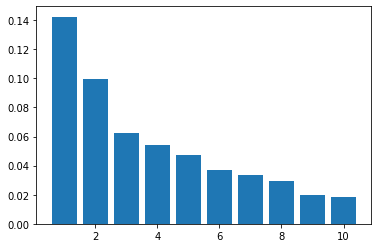

In [153]:
fig, ax = plt.subplots()
ax.bar(range(1, 11, 1), pca.explained_variance_ratio_)

## Plot the data

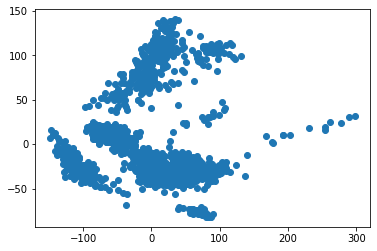

In [198]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

In [195]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

In [227]:
pca_output_df['SMTS'] = df_metadata['SMTS']
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SMTS
0,-110.413957,-14.334740,51.745519,-21.305549,-11.809352,5.498883,7.879463,-3.500183,-13.561180,-29.970572,NaN
1,5.681966,125.914671,9.134414,-15.361088,25.276655,-8.446387,-29.123907,-3.443429,-11.004977,46.149375,NaN
2,79.909076,110.935439,17.085827,-49.776852,17.003933,67.551472,85.044416,-32.970688,-39.459688,11.729647,NaN
3,-0.347441,112.246918,12.691160,-12.519275,15.641350,-9.176154,-37.572780,6.951318,-8.111348,22.194199,Blood
4,5.870993,94.772425,4.917721,-7.156686,13.732410,-19.220271,-31.723976,6.155585,4.347747,-3.735483,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604458,-7.661698,0.301052,88.683888,-60.358271,-26.739264,-8.412152,2.516020,NaN
1637,-44.093672,7.661655,-38.931137,65.432881,15.476219,25.019230,47.227399,-1.176876,29.592218,13.295032,Muscle
1638,-22.706015,-7.790671,-16.560730,7.469913,-17.471930,-8.335428,0.055930,10.385971,-28.492404,-1.112075,NaN
1639,94.765495,104.558619,18.559765,-55.980138,8.899316,69.093484,107.839232,-42.544040,-36.128990,6.319128,Thyroid


In [228]:
pca_output_df['Tissue'] = df_metadata['SMTS'].tolist()
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SMTS,Tissue
0,-110.413957,-14.334740,51.745519,-21.305549,-11.809352,5.498883,7.879463,-3.500183,-13.561180,-29.970572,NaN,Blood
1,5.681966,125.914671,9.134414,-15.361088,25.276655,-8.446387,-29.123907,-3.443429,-11.004977,46.149375,NaN,Brain
2,79.909076,110.935439,17.085827,-49.776852,17.003933,67.551472,85.044416,-32.970688,-39.459688,11.729647,NaN,Brain
3,-0.347441,112.246918,12.691160,-12.519275,15.641350,-9.176154,-37.572780,6.951318,-8.111348,22.194199,Blood,Brain
4,5.870993,94.772425,4.917721,-7.156686,13.732410,-19.220271,-31.723976,6.155585,4.347747,-3.735483,NaN,Brain
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604458,-7.661698,0.301052,88.683888,-60.358271,-26.739264,-8.412152,2.516020,NaN,Skin
1637,-44.093672,7.661655,-38.931137,65.432881,15.476219,25.019230,47.227399,-1.176876,29.592218,13.295032,Muscle,Muscle
1638,-22.706015,-7.790671,-16.560730,7.469913,-17.471930,-8.335428,0.055930,10.385971,-28.492404,-1.112075,NaN,Heart
1639,94.765495,104.558619,18.559765,-55.980138,8.899316,69.093484,107.839232,-42.544040,-36.128990,6.319128,Thyroid,Brain


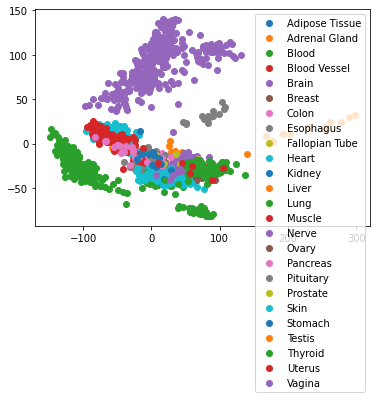

In [242]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("Tissue")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)

plt.legend()
fig.subplots_adjust(bottom=0.2)

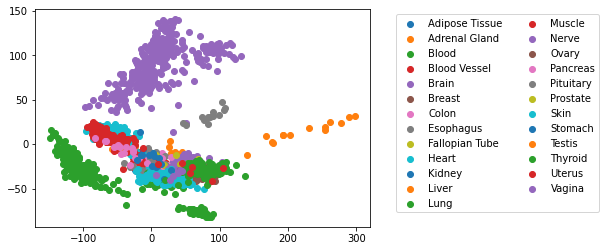

In [268]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("Tissue")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)

plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

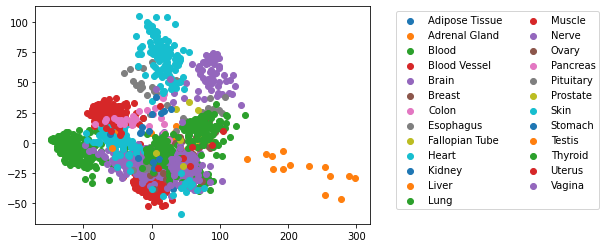

In [273]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("Tissue")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC6'], label = name)

plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

## Exercise

In [295]:
# Extract data from a single tissue
# perform PCA
# explore the metadata frame
# is there any variable that is correlated with the top principal components?